In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

In [2]:
df = pd.read_csv("bodyPerformance.csv")

In [3]:
display(df.head())
display(df.info())
display(df.describe().T)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
age                        13393 non-null float64
gender                     13393 non-null object
height_cm                  13393 non-null float64
weight_kg                  13393 non-null float64
body fat_%                 13393 non-null float64
diastolic                  13393 non-null float64
systolic                   13393 non-null float64
gripForce                  13393 non-null float64
sit and bend forward_cm    13393 non-null float64
sit-ups counts             13393 non-null float64
broad jump_cm              13393 non-null float64
class                      13393 non-null object
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


None

,count,mean,std,min,25%,50%,75%,max
age,13393.0,36.775106,13.625639,21.0,25.0,32.0,48.0,64.0
height_cm,13393.0,168.559807,8.426583,125.0,162.4,169.2,174.8,193.8
weight_kg,13393.0,67.447316,11.949666,26.3,58.2,67.4,75.3,138.1
body fat_%,13393.0,23.240165,7.256844,3.0,18.0,22.8,28.0,78.4
diastolic,13393.0,78.796842,10.742033,0.0,71.0,79.0,86.0,156.2
systolic,13393.0,130.234817,14.713954,0.0,120.0,130.0,141.0,201.0
gripForce,13393.0,36.963877,10.624864,0.0,27.5,37.9,45.2,70.5
sit and bend forward_cm,13393.0,15.209268,8.456677,-25.0,10.9,16.2,20.7,213.0
sit-ups counts,13393.0,39.771224,14.276698,0.0,30.0,41.0,50.0,80.0
broad jump_cm,13393.0,190.129627,39.868000,0.0,162.0,193.0,221.0,303.0


In [4]:
df.isnull().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

In [5]:
# Removing outliers
df = df[df['body fat_%'] < 54.9]
df = df[1 < df['diastolic']]
df = df[df['diastolic'] <= 126]
df = df[1 < df['systolic']]
df = df[1<df['gripForce']]
df = df[1 < df['sit-ups counts']]
df = df[20 < df['broad jump_cm']]
df = df[df['sit and bend forward_cm'] <= 42]
df = df[df['sit and bend forward_cm'] > 0]

In [6]:
df['gender'].value_counts()

M    7911
F    4689
Name: gender, dtype: int64

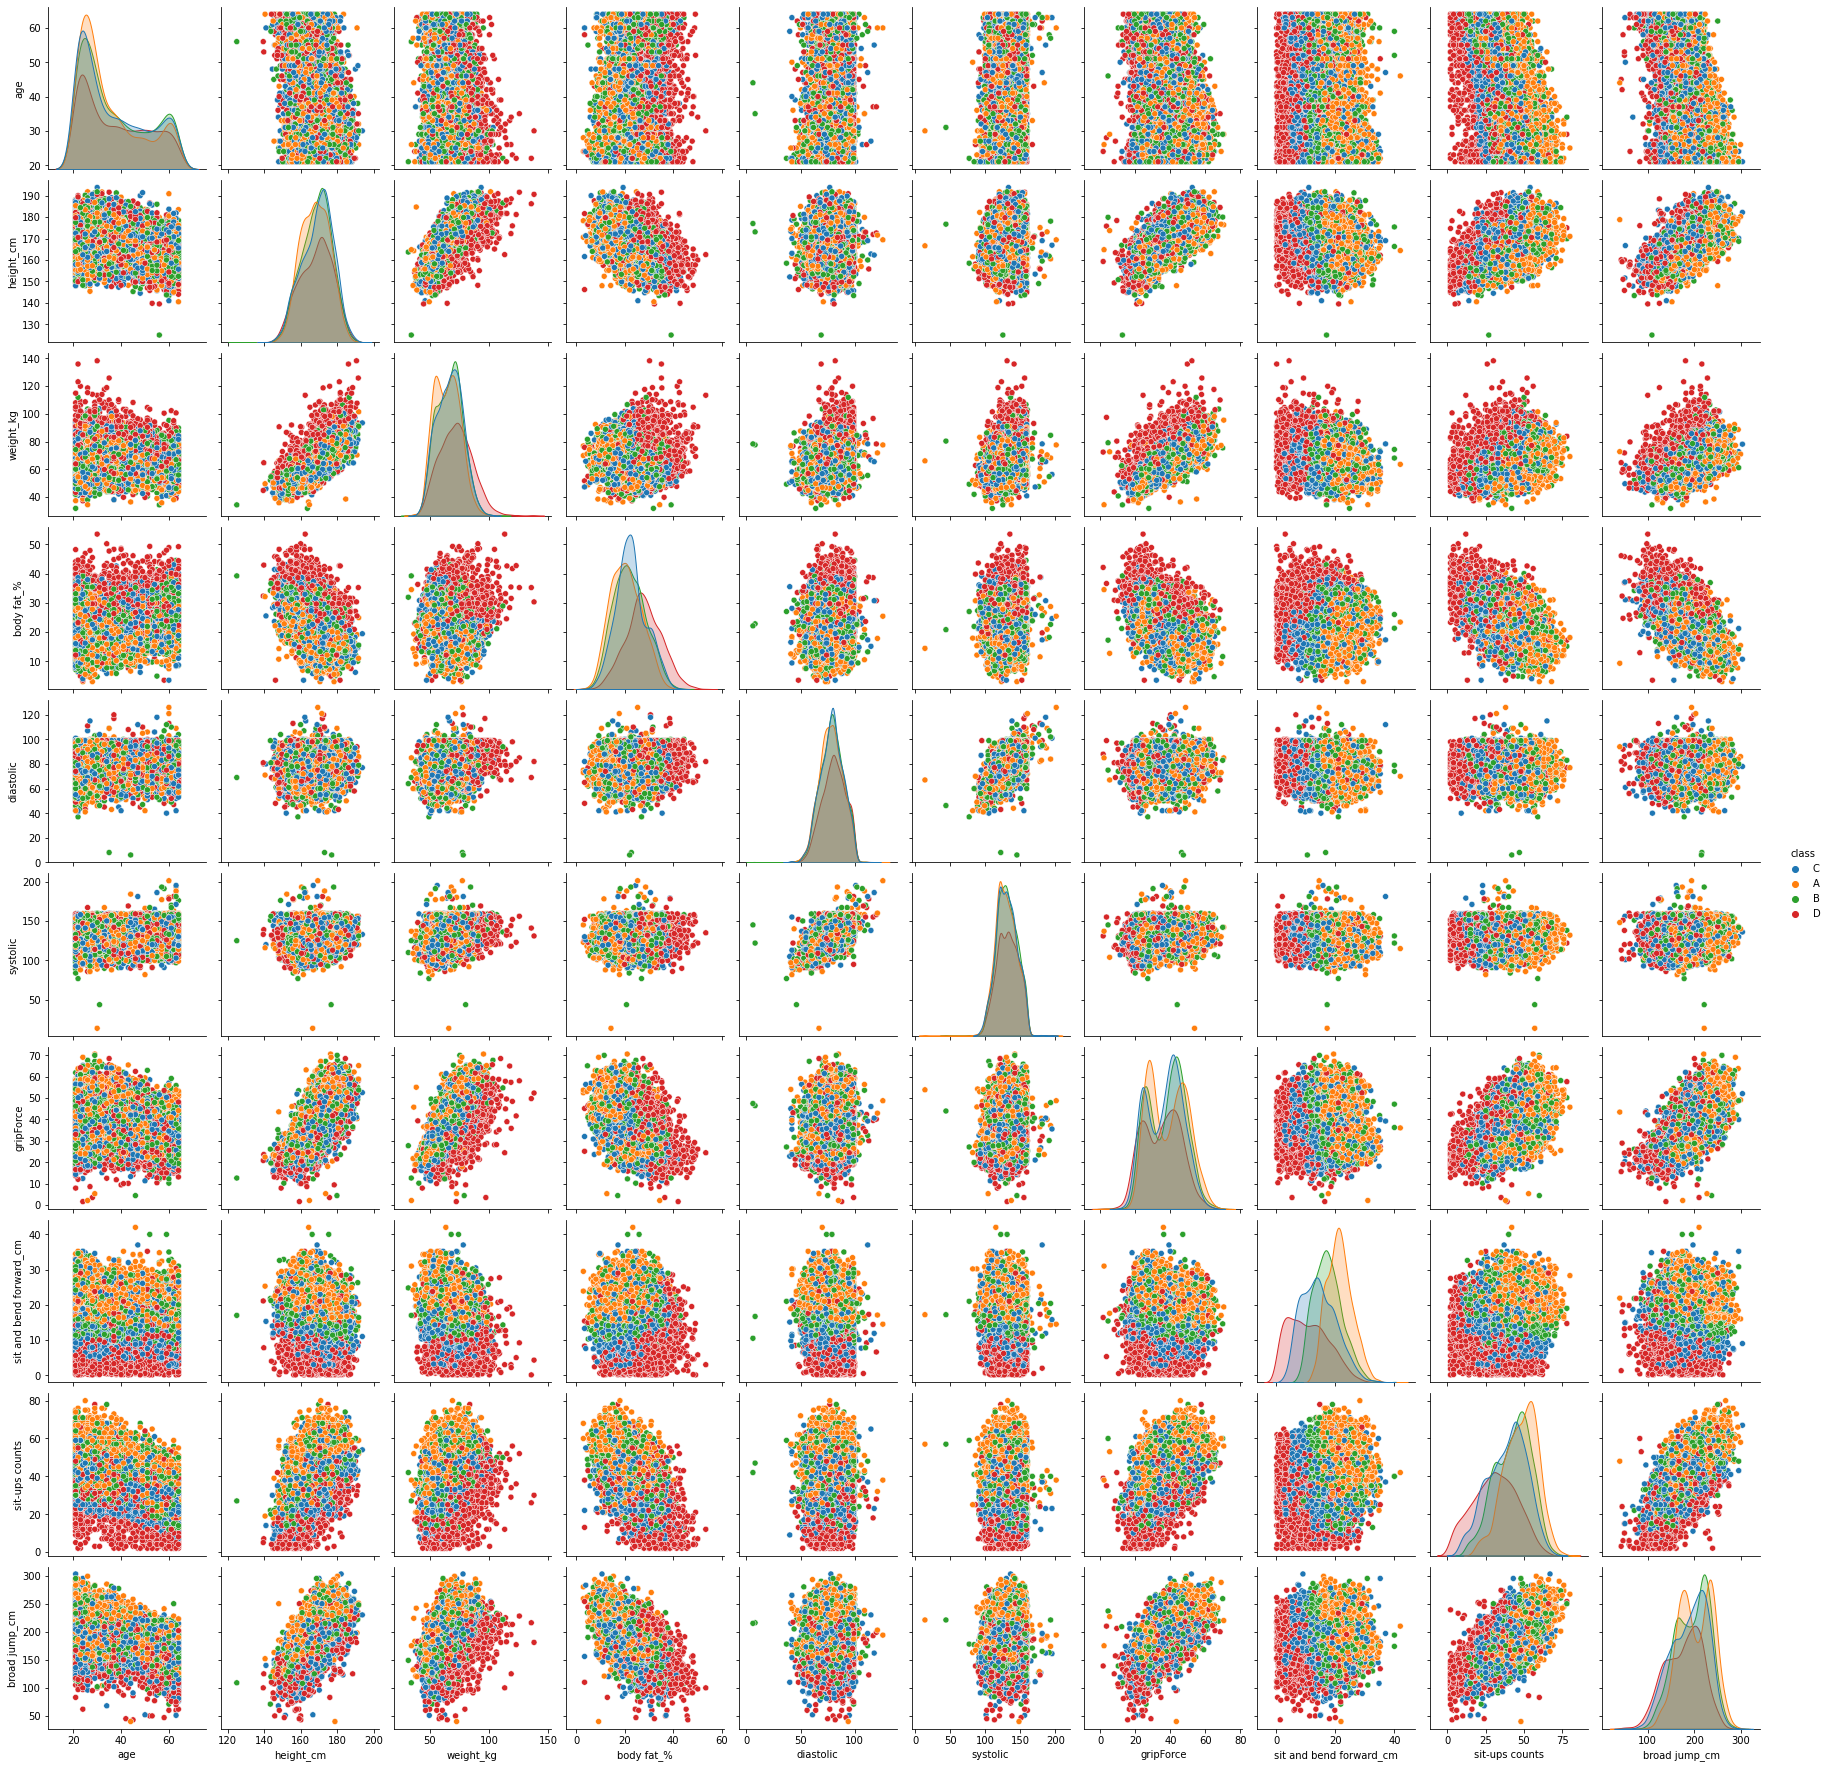

In [7]:
sns.pairplot(df, hue="class")

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["class"] = le.fit_transform(df["class"])
df["gender"] = le.fit_transform(df["gender"])

In [9]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix
import seaborn as sns
# function for evaluation metrics precision, recall, f1 etc
def modelEvaluation(predictions, y_test_set, model_name):
    # Print model evaluation to predicted result    
    print("==========",model_name,"==========")
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test_set, predictions)))    
    print ("\nClassification report : \n", classification_report(y_test_set, predictions))
    print ("\nConfusion Matrix : \n", confusion_matrix(y_test_set, predictions))
    sns.heatmap(confusion_matrix(y_test_set, predictions),annot=True, fmt='g',cmap='viridis')
    plt.tight_layout()
    plt.show()
    results = [accuracy_score(y_test_set, predictions), precision_score(y_test_set, predictions, average='macro'),
              recall_score(y_test_set, predictions, average='macro'),f1_score(y_test_set, predictions, average='macro')]
    return results

In [12]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

========== Decision tree Classifier ==========

Accuracy on validation set: 0.6253

Classification report : 
               precision    recall  f1-score   support

           0       0.70      0.71      0.70      1107
           1       0.51      0.52      0.51      1089
           2       0.59      0.58      0.58      1115
           3       0.72      0.72      0.72       847

    accuracy                           0.63      4158
   macro avg       0.63      0.63      0.63      4158
weighted avg       0.63      0.63      0.63      4158


Confusion Matrix : 
 [[787 223  79  18]
 [234 562 229  64]
 [ 82 236 642 155]
 [ 23  78 137 609]]


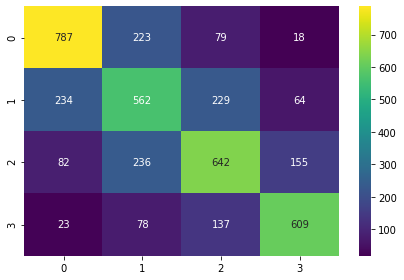

In [13]:
results_dtc = modelEvaluation( y_test, y_pred_dtc, "Decision tree Classifier")

In [14]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

========== Multinomial Naive Bayes ==========

Accuracy on validation set: 0.4582

Classification report : 
               precision    recall  f1-score   support

           0       0.69      0.49      0.57      1577
           1       0.20      0.35      0.26       645
           2       0.34      0.44      0.38       839
           3       0.64      0.49      0.56      1097

    accuracy                           0.46      4158
   macro avg       0.47      0.44      0.44      4158
weighted avg       0.53      0.46      0.48      4158


Confusion Matrix : 
 [[773 479 274  51]
 [230 223 144  48]
 [ 65 204 366 204]
 [ 58 193 303 543]]


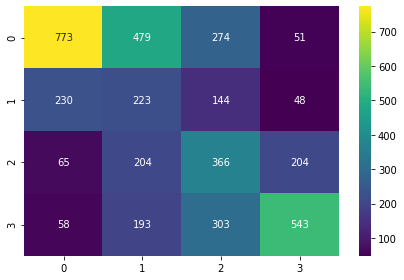

In [15]:
results_nb = modelEvaluation(y_test, y_pred_nb, "Multinomial Naive Bayes")

In [16]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

========== SVC Classifier ==========

Accuracy on validation set: 0.5859

Classification report : 
               precision    recall  f1-score   support

           0       0.72      0.67      0.69      1206
           1       0.46      0.43      0.45      1170
           2       0.56      0.53      0.55      1145
           3       0.60      0.80      0.68       637

    accuracy                           0.59      4158
   macro avg       0.59      0.61      0.59      4158
weighted avg       0.59      0.59      0.58      4158


Confusion Matrix : 
 [[810 290  84  22]
 [290 507 292  81]
 [ 26 271 612 236]
 [  0  31  99 507]]


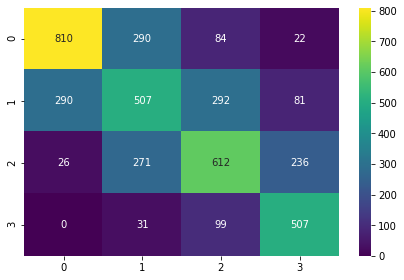

In [17]:
results_svc = modelEvaluation(y_test, y_pred_svc, "SVC Classifier")

In [18]:
from tabulate import tabulate
# showing all models result
dic = {
    'Metrics':['accuracy','precision','recall','f1-score'],
    'Decision tree' : results_dtc,
    'Naive Bayes' : results_nb,
    'SVC' : results_svc,
}
metrics_df = pd.DataFrame(dic)

metrics_df = metrics_df.set_index('Metrics')
# displaying the DataFrame
print(tabulate(metrics_df, headers = 'keys', tablefmt = 'psql'))

+-----------+-----------------+---------------+----------+
| Metrics   |   Decision tree |   Naive Bayes |      SVC |
|-----------+-----------------+---------------+----------|
| accuracy  |        0.625301 |      0.458153 | 0.585859 |
| precision |        0.630196 |      0.466991 | 0.585749 |
| recall    |        0.630448 |      0.441782 | 0.608848 |
| f1-score  |        0.630283 |      0.441671 | 0.593428 |
+-----------+-----------------+---------------+----------+


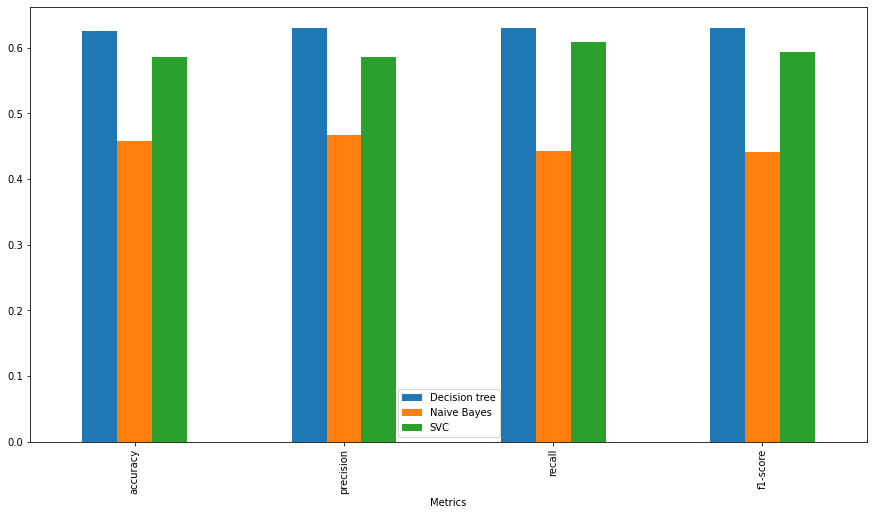

In [19]:
metrics_df.plot(kind='bar', figsize=(15,8))
plt.show()

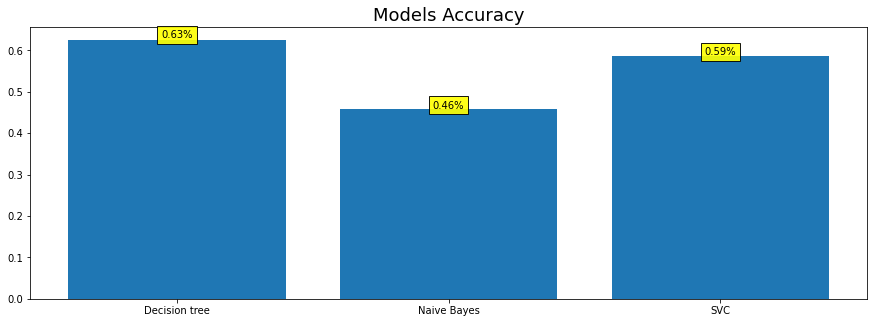

In [20]:
models_acc = metrics_df.iloc[0].tolist()
models_names = metrics_df.columns.tolist()
plt.figure(figsize=(15,5))
plt.bar(models_names,models_acc)
plt.title("Models Accuracy", fontsize=18)

def addLabels(names,acc):
    for i in range(len(names)):
        plt.text(i,round(acc[i],2),f"{round(acc[i],2)}%", ha = 'center', bbox=dict(facecolor='yellow', alpha=0.9))

addLabels(models_names,models_acc)
plt.show()